# Part II - How APR and listing category affect loan status
## by Ovy Evbodi


## Investigation Overview

In my analysis, I was interested in exploring how factors like APR, loan amount, listing category and some other factors influence the outcome of a loan status, and what the trend was with borrowers that defaulted in loan payments.

## Dataset Overview

The DataFrame comprises of 113,937 records, with 81 columns including the borrower's occupation, credit grade, loan status and many more. Please take out some time to read through the readme file(if you haven't already done that) to have a better understanding of the columns in this DataFrame.

In [1]:
#importing packages needed, and configuring matplotlib to render plots inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#setting up matplotlib to render plots larger and inline, and seaborn's grid style
%matplotlib inline
sb.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,8)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
sb.set(rc={"figure.dpi":100, 'savefig.dpi':300})

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

/opt/anaconda2/envs/alx_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  if sys.path[0] == '':


In [2]:
#loading the prosper loan dataset into a pandas DataFrame
loan_df = pd.read_csv('prosperLoanData.csv')

## Employment status and loan status outcome
The employment status doesn't seem to have any relationship with a borrower defaulting in loan payment. Over 80% of borrowers in each category completed their loan payment when compared to those who defaulted in their payment.

In [3]:
#a function to get the proportions of loan status by employment status
def variable_proportions(column, DataFrame, hue):
    TotalValues_forEachCategory = DataFrame.groupby([column])[hue].count()
    valuesFor_LoanStatus = DataFrame.groupby([column, hue])[hue].count()
    proportions = valuesFor_LoanStatus / TotalValues_forEachCategory
    return proportions

#a function to plot the proportions loan status by the employment status
def proportions_plot(proportions, column_names):
    # Proportions come from get_propotion function.
    proportions.unstack().plot(kind='bar');
    plt.ylabel('Proportions')
    plt.title(f'The relationship between {column_names} and loan status', fontsize=15, )

#creating a new column for loans status where the value is either 'Completed' or 'Defaulted'
new = loan_df.query('LoanStatus == "Completed" | LoanStatus == "Defaulted"')
loan_df['Loan_Status'] = new['LoanStatus']

    

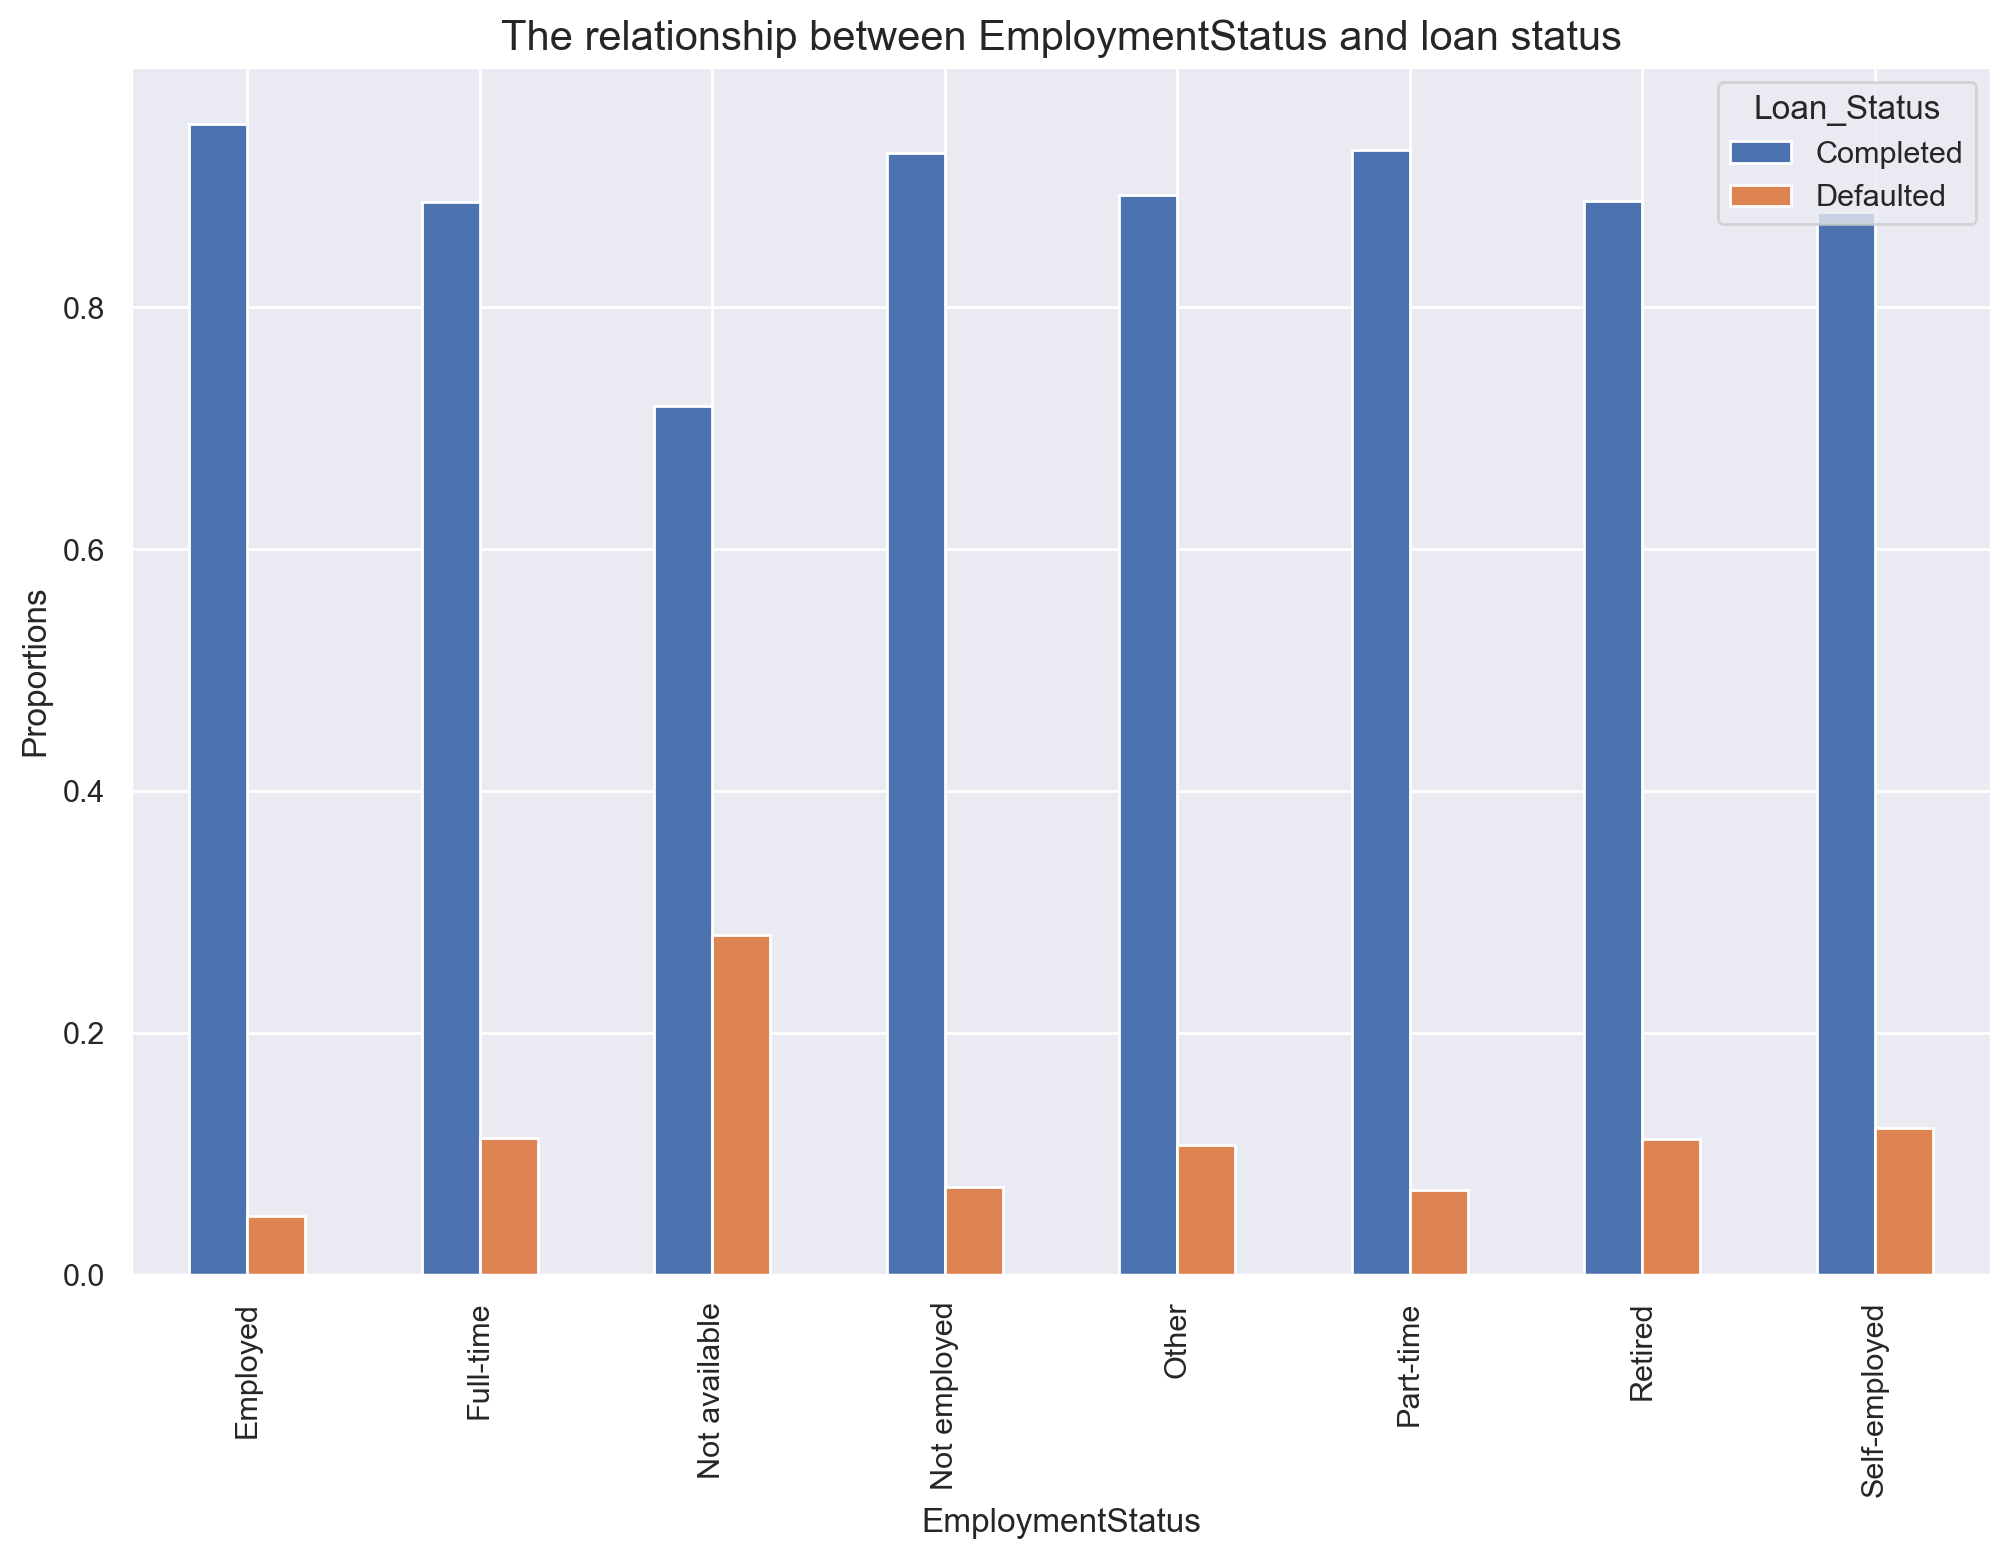

In [4]:
    
#calling the functions for plotting the proportions of loan status values on the new column
proportions = variable_proportions('EmploymentStatus', loan_df, 'Loan_Status')
proportions_plot(proportions, 'EmploymentStatus')



## The relationship between the loan status, APR and listing category
Loans with an APR higher than 0.25 had defaulters, especially the ones taken out for debt consolidation or home improvement.

In [5]:
#renaming some columns of interest to follow the standard python convention
loan_df.rename(columns ={'ListingCategory (numeric)': 'ListingCategory',
                         'ProsperRating (numeric)':'ProsperRating',
                         'ProsperRating (Alpha)':'ProsperRating',
                         'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent'}, inplace=True)



#plotting a clustered

In [6]:
#converting the datatype of the values in the 'ListingCategory' column from integar to str
loan_df['ListingCategory'] = loan_df['ListingCategory'].astype('str')


#creating a new column for listing category where the value is 
#1,2 or 3(representing debt consolidation, home improvement and business respectively)
listings = loan_df.query('ListingCategory == "1" | ListingCategory == "2"| ListingCategory == "3" ')
loan_df['topListings'] = listings['ListingCategory']

#renaming the values for semantics
replacements = {'1':'debt consolidation', '2':'home improvement', '3':'business'}
loan_df['topListings'] = loan_df['topListings'].replace(replacements)


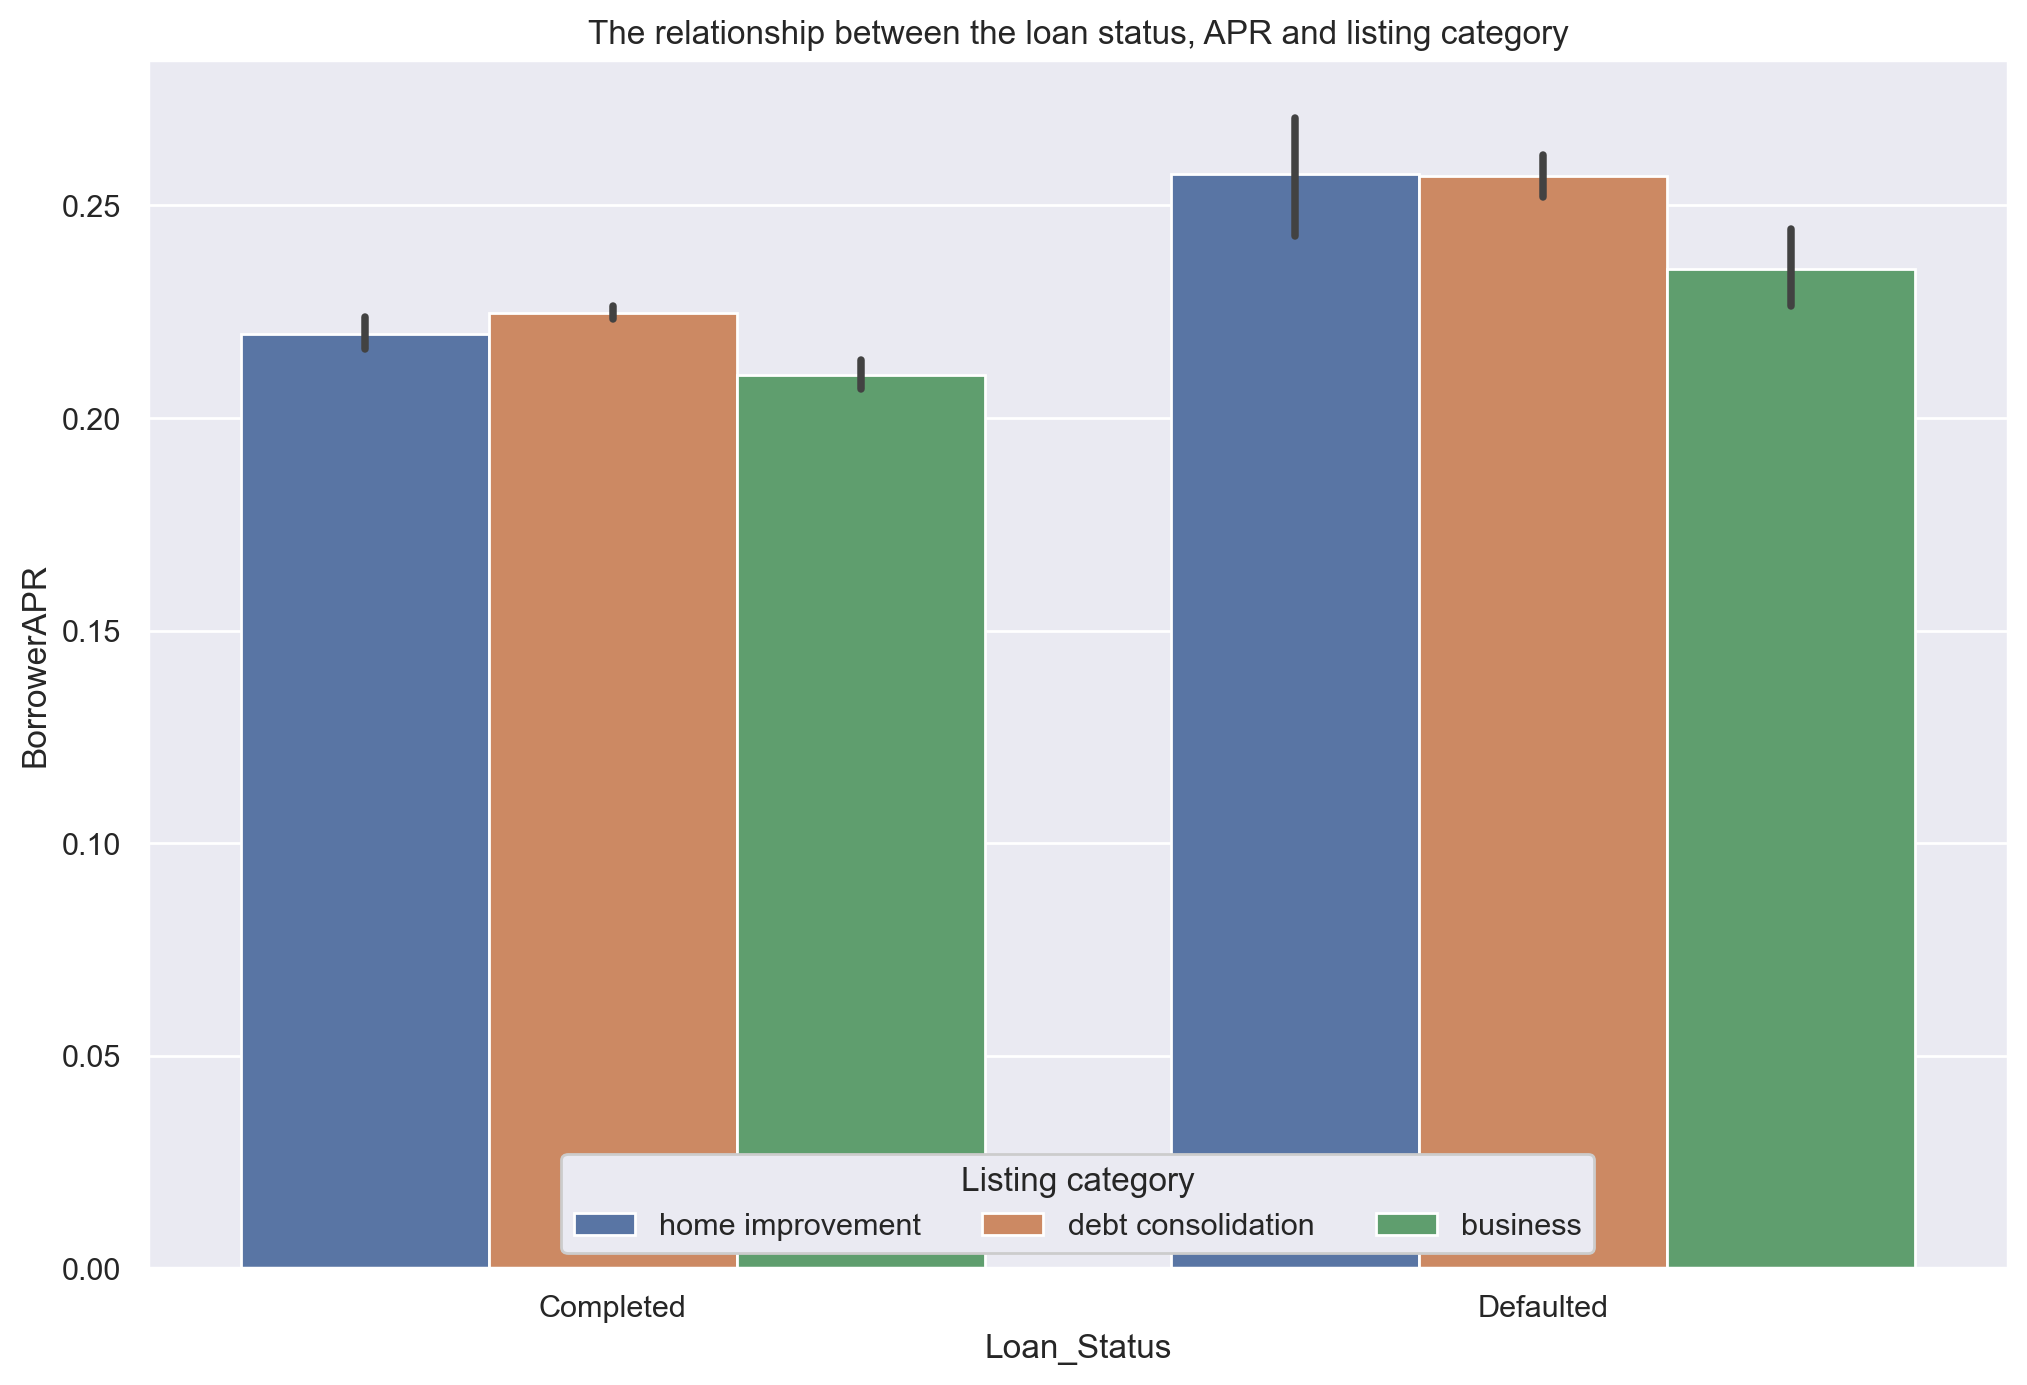

In [7]:
#creating the plot
ax = sb.barplot(data = loan_df, y = 'BorrowerAPR', x = 'Loan_Status', hue = 'topListings')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Listing category')
plt.title('The relationship between the loan status, APR and listing category')
plt.show()

## How the number of recommendations, and the loan amount affect the loan status outcome.
Loans with a higher number of recommendations tend to be paid off when compared with those with a lower number of recommendation. Higher loan amounts had more recommendations, while lower loan amounts had fwer recommendations, and were past due.



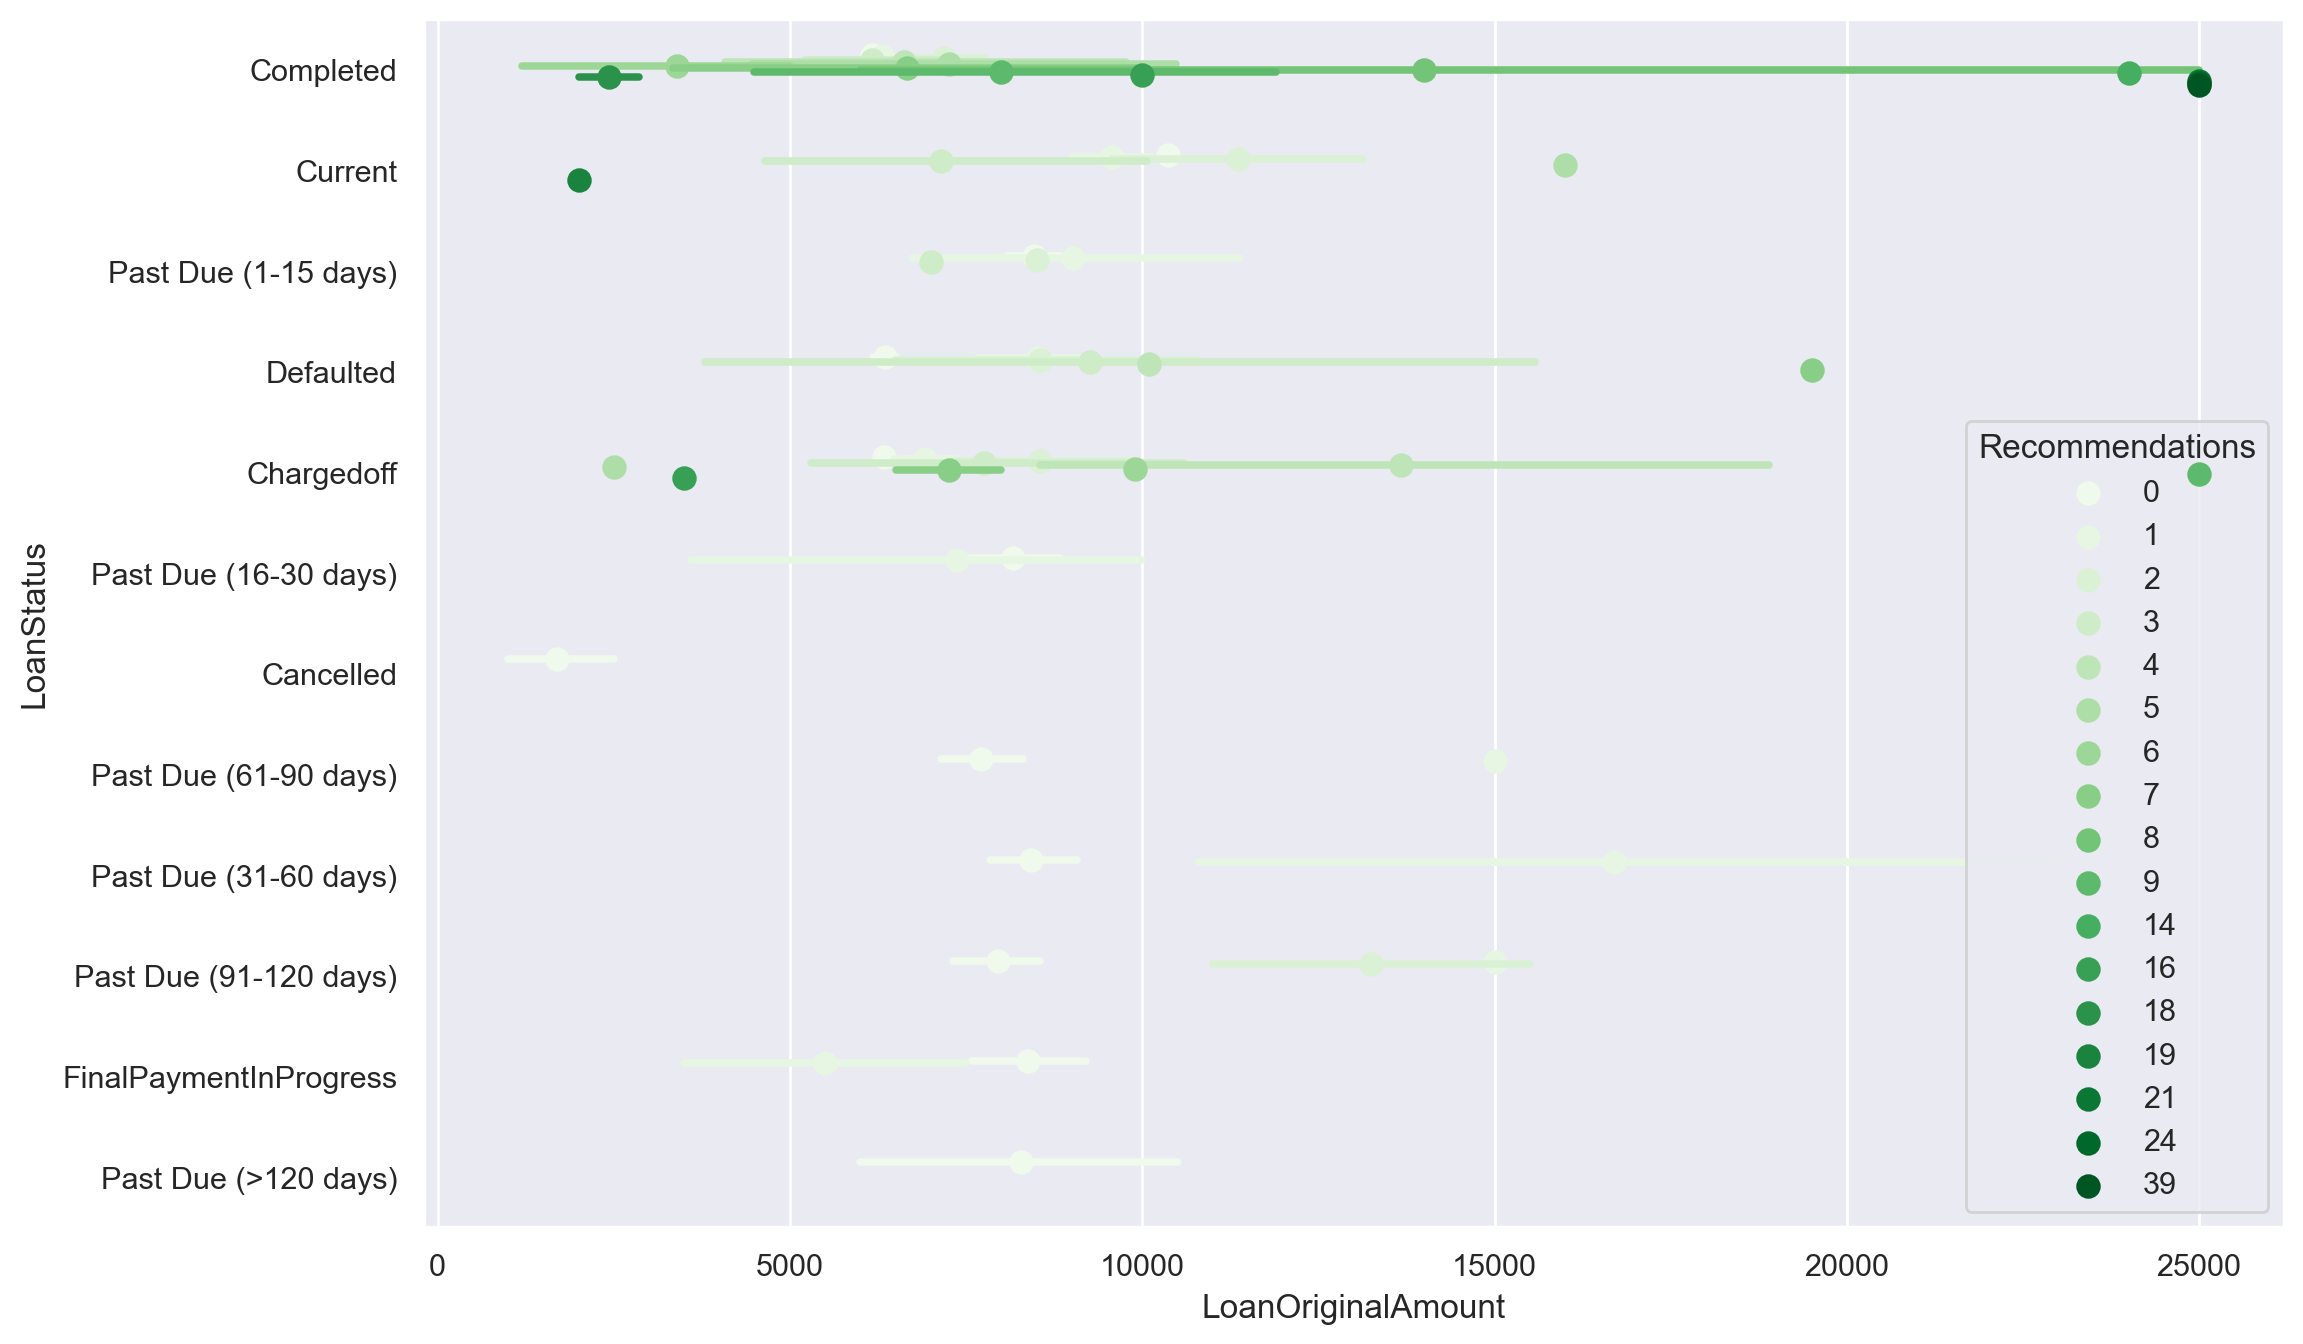

In [8]:
#creating a point plot
ax = sb.pointplot(data = loan_df, x = 'LoanOriginalAmount', y = 'LoanStatus', hue = 'Recommendations',
                  dodge = 0.3, linestyles = "", palette='Greens')
plt.show()

In [9]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/bash: Part_II_Filename: No such file or directory
